In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = pd.read_csv('iris.txt',header = None)

In [4]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
def distEclud(arrA, arrB):
    d = arrA - arrB
    dist = np.sum(np.power(d, 2), axis=1)
    return dist

In [10]:
def randCent(dataSet, k): 
    n = dataSet.shape[1]
    data_min = dataSet.iloc[:, :n-1].min()
    data_max = dataSet.iloc[:, :n-1].max()
    data_cent = np.random.uniform(data_min,data_max,(k, n-1))
    return data_cent

In [11]:
iris_cent = randCent(iris, 3)

In [12]:
iris_cent

array([[5.6681909 , 2.9936977 , 2.22547812, 0.33699055],
       [7.3858639 , 2.15918355, 6.63090237, 0.24401612],
       [4.77141635, 2.5489616 , 4.89664913, 2.15418017]])

In [47]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m,n = dataSet.shape
    centroids = createCent(dataSet, k)
    clusterAssment = np.zeros((m,3))
    clusterAssment[:, 0] = np.inf
    clusterAssment[:, 1: 3] = -1
    result_set = pd.concat([dataSet, pd.DataFrame(clusterAssment)], axis=1, ignore_index = True)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            dist = distMeas(dataSet.iloc[i, :n-1].values, centroids)
            result_set.iloc[i, n] = dist.min()
            result_set.iloc[i, n+1] = np.where(dist == dist.min())[0]
        clusterChanged = not (result_set.iloc[:, -1] == result_set.iloc[:, -2]).all()
        if clusterChanged:
            cent_df = result_set.groupby(n+1).mean()
            centroids = cent_df.iloc[:,:n-1].values
            result_set.iloc[:, -1] = result_set.iloc[:, -2]
    return centroids, result_set

In [51]:
iris_cent,iris_result= kMeans(iris, 3)

In [52]:
iris_cent

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [54]:
iris_result.iloc[:,-1].value_counts()

1.0    61
0.0    50
2.0    39
Name: 7, dtype: int64

In [55]:
testSet = pd.read_table('testSet.txt', header=None)

In [56]:
testSet.head()

,0,1
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,-1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


In [57]:
testSet.shape

(80, 2)

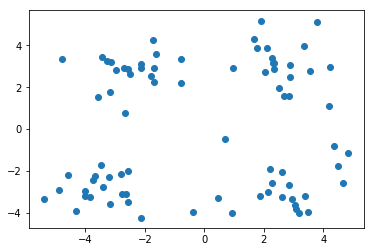

In [58]:
plt.scatter(testSet.iloc[:,0], testSet.iloc[:,1]);

In [62]:
ze = pd.DataFrame(np.zeros(testSet.shape[0]).reshape(-1, 1))
test_set = pd.concat([testSet, ze], axis=1, ignore_index = True)
test_set.head()

,0,1,2
0,1.658985,4.285136,0.0
1,-3.453687,3.424321,0.0
2,4.838138,-1.151539,0.0
3,-5.379713,-3.362104,0.0
4,0.972564,2.924086,0.0


In [65]:
test_cent, test_cluster = kMeans(test_set, 4)

In [66]:
test_cent

array([[-3.38237045, -2.9473363 ],
       [-2.46154315,  2.78737555],
       [ 2.6265299 ,  3.10868015],
       [ 2.80293085, -2.7315146 ]])

In [68]:
test_cluster.head()

,0,1,2,3,4,5
0,1.658985,4.285136,0.0,2.320192,2.0,2.0
1,-3.453687,3.424321,0.0,1.390049,1.0,1.0
2,4.838138,-1.151539,0.0,6.638391,3.0,3.0
3,-5.379713,-3.362104,0.0,4.161410,0.0,0.0
4,0.972564,2.924086,0.0,2.769678,2.0,2.0


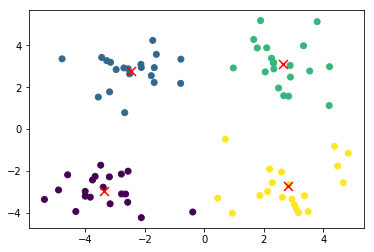

In [69]:
plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
plt.scatter(test_cent[:, 0], test_cent[:, 1], color='red',marker='x',s=80);

In [71]:
test_cluster.iloc[:,3].sum()

149.95430467642635

In [72]:
iris_result.iloc[:,5].sum()

78.94506582597731

In [73]:
def kcLearningCurve(dataSet, cluster = kMeans, k=10):
    n = dataSet.shape[1]
    SSE = []
    for i in range(1, k):
        centroids, result_set = cluster(dataSet, i+1)
        SSE.append(result_set.iloc[:,n].sum())
    plt.plot(range(2, k+1), SSE, '--o')
    return SSE

[152.36870647733906,
 152.36870647733906,
 57.47327326549491,
 57.37175929288103,
 57.345409315718165,
 50.03412205564044,
 45.86583312303748,
 34.78487447441731,
 42.633389399647015]

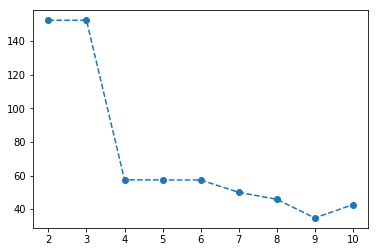

In [76]:
kcLearningCurve(iris)

[792.9168565373268,
 506.0588518418539,
 149.95430467642635,
 137.53220904203863,
 134.72055635405397,
 119.89141038793534,
 102.12229010757292,
 81.34334454670369,
 93.73985111544398]

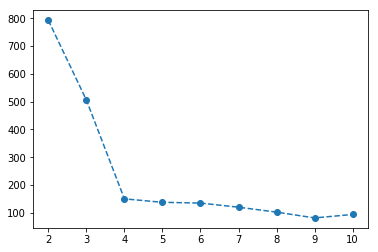

In [75]:
kcLearningCurve(test_set)

463.6496809222772
506.0588518418539
405.13810196190366
405.13810196190366


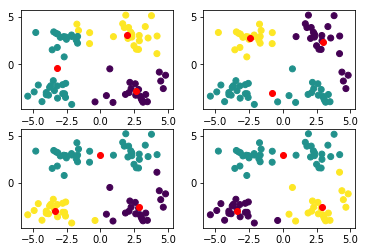

In [77]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 3)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

438.99925511275205
149.95430467642635
149.95430467642635
150.62604907269227


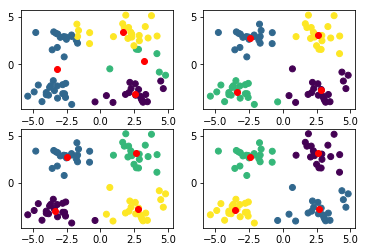

In [78]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 4)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())

132.51859467191917
134.72812560240237
134.4631443966685
131.89160568812764


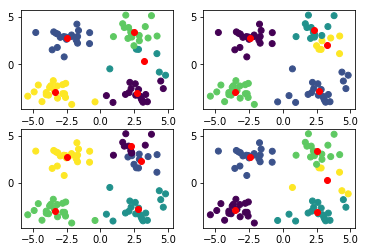

In [79]:
np.random.seed(123)
for i in range(1, 5):
    plt.subplot(2, 2, i)
    test_cent, test_cluster = kMeans(test_set, 5)
    plt.scatter(test_cluster.iloc[:,0], test_cluster.iloc[:, 1], c=test_cluster.iloc[:, -1])
    plt.plot(test_cent[:, 0], test_cent[:, 1], 'o', color='red')
    print(test_cluster.iloc[:, 3].sum())